#<a name='5'></a>
<div dir='rtl'>
<h1>5. رابطه‌ی توزیع دوجمله‌ای با برنولی</h1>
</div>

<div dir='rtl'>
در ارائه‌ی درس دیدیم که توزیع دوجمله‌ای، معادل مجموع نتایج حاصل از تکرار نمونه‌برداری از یک توزیع برنولی است. همچنین دیدیم اگر
$X$
یک متغیر تصادفی از توزیع برنولی با میانگین/احتمال موفقیت
$p$
و
$Y$
متغیر تصادفی از توزیع دوجمله‌ای، حاصل جمع
$n$
بار تکرار نمونه‌برداری از توزیع
$X$
باشد، آنگاه میانگین و واریانس توزیع
$Y$
به شکل زیر قابل محاسبه است:
$$
E[Y] = np
$$
$$
Var(Y) = np(1-p)
$$
در این بخش، قصد داریم این روابط را به صورت عملی بررسی کنیم. ابتدا تابعی برای نمونه برداری از توزیع دوجمله‌ای با استفاده از توزیع برنولی می‌نویسیم. سپس به ازای مقادیر مختلف
$p$
به عنوان میانگین توزیع برنولی مورد استفاده، تعداد زیادی نمونه از توزیع دوجمله‌ای برداشته و سپس میانگین و واریانس را محاسبه می‌کنیم.
با مقایسه‌ی نمودار‌های میانگین و واریانس به ازای مقادیر مختلف
$p$
با نمودار روابط داده شده برای میانگین و واریانس توزیع دوجمله‌ای، صدق این روابط را نشان خواهیم داد.
</div>

<div dir='rtl'>
در ابتدا، تابع نمونه‌برداری از توزیع دوجمله‌ای را بر مبنای توزیع برنولی پیاده‌سازی می‌کنیم. فرض کنید قصد داریم
$m$
نمونه از توزیع دوجمله‌ای متناظر با
$n$
بار تکرار یک توزیع برنولی تولید کنیم.
برای این کار نیاز داریم
$m$
دسته
$n$
تایی از توزیع برنولی مذکور نمونه برداری کرده و مجموع نمونه‌های هر دسته را محاسبه و به عنوان مقدار خروجی بازگردانیم.
برای ایجاد این دسته بندی، با هدف پرهیز از استفاده از حلقه
$for$،
در ابتدا
$n*m$
نمونه از توزیع برنولی گرفته و با یک تغییر ابعاد، آن‌ها را به یک ماتریس
$m$
در 
$n$
تبدیل و مجموع هر سطر را محاسبه می‌کنیم.
</div>

In [1]:
install.packages("statip")
library(statip)
# `rbern(n, p)` function, defined in "statip" library, returns `n` sample of
# bernuli distribution with `p=p`.
rbern(10, .3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘clue’




[1] 0 1 1 1 0 0 1 0 0 0

In [2]:
# `rbinomial(m, n, p)` function is going to return `m` sample of binomial
# distribution which presents `n` sample of bernoli distribution with `p=p`.
rbinomial <- function(m, n, p) {
  data <- matrix(rbern(m*n, p))
  # Next line is reshaping `data` with m*n length to (m, n).
  dim(data) <- c(m, n)
  # After that we will sum up each row.
  data <- rowSums(data)
  return (data)
}

rbinomial(5, 10, .3)

[1] 2 1 3 5 2

<div dir='rtl'>
حال به ازای مقدار ثابت
$n=500$،
به ازای هر
$p$،
۵۰۰۰
نمونه از توزیع دوجمله‌ای برداشته و میانگین و واریانس را محاسبه و رسم می‌کنیم.
</div>

In [3]:
theoretical_mean = c()
theoretical_var = c()
observed_mean = c()
observed_var = c()

n = 500
samples_count = 5000
for (p100 in 0:100) {
  p = p100/100
  # We can use `c()` function to concatinate two lists.
  # `mean()` function computes mean of a population.
  # `var()` function computes variance of a population.
  # In this loop you need to fill the following variables:      #
  # `theoretical_mean`, `theoretical_var`, `samples_count`,     #
  # `samples`, `observed_mean`, and `observed_var`              #
  # `samples` variable represent the binomial distribution and  #
  # is used in filling `observed_mean` and `observed_var`.      #
  
  data <- rbinomial(samples_count, n, p)
  theoretical_mean = c(theoretical_mean, c(n*p))
  theoretical_var = c(theoretical_var, c(n*p*(1-p)))
  observed_mean = c(observed_mean, c(mean(data)))
  observed_var = c(observed_var, c(var(data)))
}

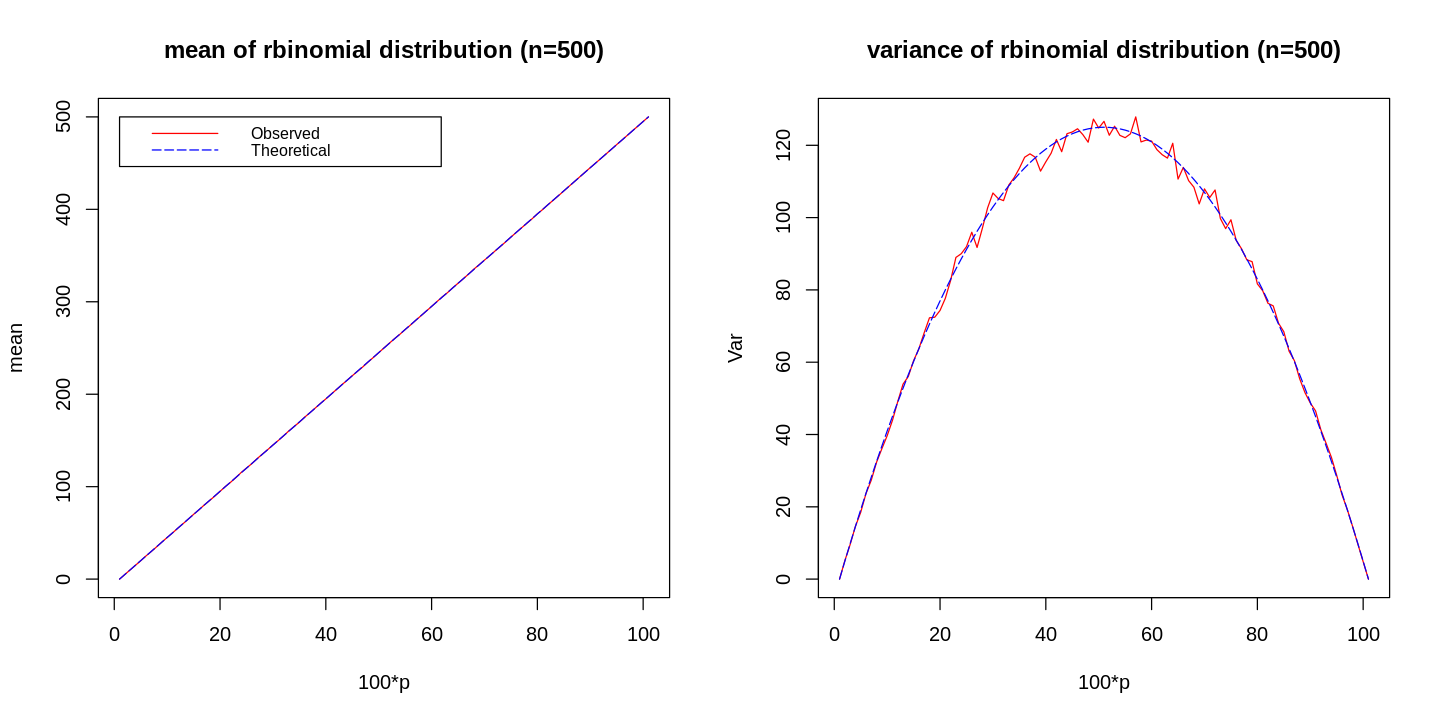

In [4]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))

plot(observed_mean, xlab = "100*p", type = "l", ylab = "mean", lty=1,
    main = "mean of rbinomial distribution (n=500)", col = 'red')
lines(theoretical_mean, col = 'blue', lty=5)
legend(1, 500, legend=c("Observed", "Theoretical"),
       col=c("red", "blue"), lty=c(1,5), cex=.8)


# Plot the observation and theoretical variance variables.    #

plot(observed_var, xlab = "100*p", type = "l", ylab = "Var", lty=1,
    main = "variance of rbinomial distribution (n=500)", col = 'red')
lines(theoretical_var, col = 'blue', lty=5)
legend(1, 500, legend=c("Observed", "Theoretical"),
       col=c("red", "blue"), lty=c(1,5), cex=.8)

<div dir='rtl'>
زبان
R
به صورت پیشفرض، توزیع دوجمله‌ای را آماده کرده و در اختیار می‌گذارد. در انتهای این بخش با دو تابع از این توزیع آشنا خواهیم شد:
</div>

In [5]:
# `rbinom(m, n, p)` returns `m` samples of a binomial distribution with
# parameters `n`,`p`.
rbinom(5, 10, .3)

[1] 1 2 1 2 5

In [6]:
# `dbinom(x, n, p)` returns probability of getting `x` as output of a binomial
# distribution with parameters `n`,`p`.
dbinom(3, 10, .3)

[1] 0.2668279

<div dir='rtl'>


</div>